<h1 style="text-align:center;">Domača naloga 2</h1>
<p style="text-align:center;">Maksimiljan Vojvoda<br/>15. Junij</p>

In [ ]:
using Domaca02

## Porazdelitvena funkcija normalne slučajne spremenljivke

Cilj naloge je napisati funkcijo za izračun vrednosti porazdelitvene funkcije normalno porazdeljene slučajne spremenljivke $X \sim N(0,1)$.
Enačba vrednosti je sledeča:
$$
	\Phi(x) = P(X \leq x) = \frac{1}{\sqrt{2 \pi}} \, \int_{-\infty}^{x} e^{-\frac{t^2}{2}} \, dt
$$

<br/><br/>
Za to nalogo je bilo izbrana rombergova metoda računanja integralov.
Zaradi tega, je potrebno neomejeno območje integriranja pretvoriti na omejeno območje.
K temu v pomoč pride dejstvo, da je $N(0,1)$ simetrična in da je $\Phi(x) = 0.5$.
Zaradi tega potrebujemo integrirati le območje med $x$ in $0$, ki ga odštejemo ali prištejemo znani vrednosti $0.5$.

$$
\Phi(x) = \left\{
	\begin{array}{ll}
		0.5 + \frac{1}{\sqrt{2 \pi}} \, \int_{0}^{x} e^{-\frac{t^2}{2}} \, dt     & x > 0 \\
		0.5 - \frac{1}{\sqrt{2 \pi}} \, \int_{x}^{0} e^{-\frac{t^2}{2}} \, dt     & x < 0 \\
		0.5                                                                       & x = 0 \\
	\end{array}
\right. 
$$

In [2]:
"""
	Calculate normal distribution up to `x`: Φ(x) = P(X ≤ x)
	Integral is calculated using the adaptive simpsons method.
"""
function normal(x; tol=1e-10)
	if x == 0
		return 0.5
	end
		
	m = 1/sqrt(2*pi)
	f(t) = exp(-t*t/2)
	
	if x > 0
		return 0.5 + m*romberg(f, 0, x, tol=tol)
	else
		return 0.5 - m*romberg(f, x, 0, tol=tol)
	end
		
end

normal(1, tol=1e-10)

0.8413447460685426

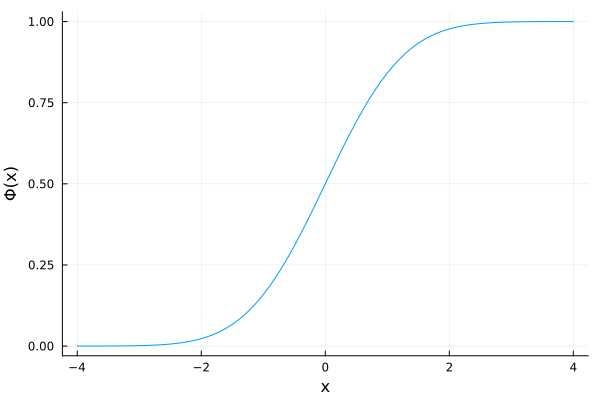

In [3]:
using Plots

plot(-4:0.1:4, normal, label="")
xlabel!("x")
ylabel!("Φ(x)")

## Sila težnosti

Cilj naloge je izračunati silo težnosti med dvema homogenima kockama na razdalji 1 enote. <br/>
Enačba je sledeča:
$$
	F = \int_{T_1}\int_{T_2} \frac{r_2 - r_1}{||r_2 - r_1||^2} \, dr_1 \, dr_2
$$

Pri tem je $r_1$ točka iz območja prve kocke, $r_2$ pa točka iz območja druge kocke.<br/>
Enačbo lahko razstavimo na 6 osnovnih integralov, kjer je integiranje x osi druge kocke na območjih 2 do 3, saj sta kocki na razdalji 1:
$$
	F =
	\int_{0}^{1}
	\int_{0}^{1}
	\int_{0}^{1}
	\int_{2}^{3}
	\int_{0}^{1}
	\int_{0}^{1}
		\frac{[x_2 - x_1, \, y_2 - y_1, \, z_2 - z_1]}{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}
	\,\, dx_1 dy_1 dz_1
	\,   dx_2 dy_2 dz_2
$$

<br/><br/>
Za to nalogo je bila izbrano sestvaljeno simpsonovo pravilo za računanje posameznih integralov.
Izvedba integriranja je preprosta, saj lahko funkciji za simpsonovo integracijo podamo serijo lambd, ki skrbijo posamezen integral.

In [4]:
function cubeForce(cubeA::Tuple{Tuple,Tuple}, cubeB::Tuple{Tuple,Tuple}, n::Int)
	Ax1, Ay1, Az1 = cubeA[1]
	Ax2, Ay2, Az2 = cubeA[2]
	Bx1, By1, Bz1 = cubeB[1]
	Bx2, By2, Bz2 = cubeB[2]
	
	return simpsonSegmented(
		x1 -> simpsonSegmented(
		y1 -> simpsonSegmented(
		z1 -> simpsonSegmented(
		x2 -> simpsonSegmented(
		y2 -> simpsonSegmented(
		z2 -> (
			force(x1, y1, z1, x2, y2, z2)	# Prej opisana funkcija F za silo med kockama
		), Bz1, Bz2, n
		), By1, By2, n
		), Bx1, Bx2, n
		), Az1, Az2, n
		), Ay1, Ay2, n
		), Ax1, Ax2, n
	)
end

A = ((0,0,0), (1,1,1))	# Prva kocka
B = ((2,0,0), (3,1,1))	# Druga kocka, z eno ploskvo na razdalji 1 od prve kocke
f = cubeForce(A, B, 20)

(0.4770790383272829, -6.375108774214766e-19, -6.553399798134602e-19)